In [ ]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random
import sys
import seaborn as sns
import pandas  as pd
import gating_variables as gate

# Functions

In [ ]:
def init_isolatedTC(T, regime_name, k):
    '''input arguments: T: duration of simulation'''

    g_Na_TC=90 #90
    g_K_TC=10  #10
    g_T_TC=2
    # DEPENDS???


    if regime_name=="regime 1":
        ## how to add two choices here?? (think)
        g_L_TC=0.01
        g_KL_TC= 0
        g_H=0.015 #0.015
        I_bg=0

    elif regime_name=="spontaneous":
        g_L_TC=0.01
        g_KL_TC= 0.0172
        g_H=0.015
        I_bg=0


    elif regime_name=="test leaky":
        g_L_TC_list= list([0.01, 0.03, 0.05, 0.07, 0.09, 0.1])
        # g_L_TC_list=list([0.3, 0.4, 0.5])
        # g_L_TC_list=list([0.03, 0.06, 0.09]) # used this for comparing gLmax effect on burst latency
        g_KL_TC= 0
        g_H=0.015
        I_bg= 0
        g_L_TC= g_L_TC_list[k]
    elif regime_name=="test gH":
        g_H_list = list([0, 0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5])
        g_L_TC=0.01
        g_KL_TC= 0
        I_bg=0
        g_H = g_H_list[k]




    Ca_conc=np.zeros(len(T))
#    Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.
    Ca_conc[0]=0.00 #mM of calcium   ---> CHECK THIS INITIAL CONC.


    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #(changed from -70 mV)
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100

    # membrane potential at each time point
    V_TC=np.zeros(len(T))
    V_TC[0]=-60 #change between 0 to -60 or -65 to Vleak value i.e, -70

    #current contributed by ion channels in each time point
    I_K_TC=np.zeros(len(T)) # Potassium
    I_Na_TC=np.zeros(len(T)) # Sodium
    I_L_TC=np.zeros(len(T)) # k Leaky channels
    I_KL_TC= np.zeros(len(T)) # k Leaky channels
    I_H_TC=np.zeros(len(T))
    I_T_TC=np.zeros(len(T))


    # open probabilities of each channel gates at each time point
    n_TC=np.zeros(len(T))
    m_TC=np.zeros(len(T))
    h_TC=np.zeros(len(T))
    S_H_TC=np.zeros(len(T))
    F_H_TC=np.zeros(len(T))

     #initial rate values for K and Na rate equations
    n_TC[0]=gate.alpha_n_TRN(V_TC[0])/(gate.alpha_n_TRN(V_TC[0])+gate.beta_n_TRN(V_TC[0]))
    m_TC[0]=gate.alpha_m_TRN(V_TC[0])/(gate.alpha_m_TRN(V_TC[0])+gate.beta_m_TRN(V_TC[0]))
    h_TC[0]=gate.alpha_h_TRN(V_TC[0])/(gate.alpha_h_TRN(V_TC[0])+gate.beta_h_TRN(V_TC[0]))
    alpha_S_TC_0= gate.H_TC_inf(V_TC[0])/gate.tau_H_S(V_TC[0])
    beta_S_TC_0= (1-gate.H_TC_inf(V_TC[0]))/gate.tau_H_S(V_TC[0])
    S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= gate.H_TC_inf(V_TC[0])/gate.tau_H_F(V_TC[0])
    beta_F_TC_0= (1-gate.H_TC_inf(V_TC[0]))/gate.tau_H_F(V_TC[0])
    F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)


    #initial rate values for
    m_Ca_TC=np.zeros(len(T))
    h_Ca_TC=np.zeros(len(T))

    m_Ca_TC[0]=gate.m_Ca_TC_inf(0)
    h_Ca_TC[0]=gate.h_Ca_TC_inf(0)

    return g_Na_TC, g_K_TC, g_T_TC, g_L_TC, g_H, g_KL_TC, I_bg, V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC

In [ ]:
def generateburstsTC(I,T,C_m,dt,regime_name,k):


        allvariables_TC={}

        g_Na_TC, g_K_TC, g_T_TC, g_L_TC, g_H, g_KL_TC, I_bg, V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC =init_isolatedTC(T, regime_name, k)

        print(g_L_TC)
        print(g_H)
        I=I

        for i in range(len(T)-1):

            I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

            I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

            I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

            I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

            I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

            I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m


            V_TC[i+1]=(I[i]/C_m-I_K_TC[i]-I_L_TC[i]-I_T_TC[i]-I_Na_TC[i]-I_H_TC[i]-I_KL_TC[i])*dt+V_TC[i]



            n_TC[i+1]=-(n_TC[i]-gate.n_inf(V_TC[i]))*dt/gate.tau_n(V_TC[i]) +n_TC[i]

            m_TC[i+1]=-(m_TC[i]-gate.m_inf(V_TC[i]))*dt/gate.tau_m(V_TC[i]) +m_TC[i]

            h_TC[i+1]=-(h_TC[i]-gate.h_inf(V_TC[i]))*dt/gate.tau_h(V_TC[i]) +h_TC[i]

            m_Ca_TC[i+1]= gate.m_Ca_TC_inf(V_TC[i+1])

            h_Ca_TC[i+1]=-(h_Ca_TC[i]-gate.h_Ca_TC_inf(V_TC[i]))*dt/gate.tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

            S_H_TC[i+1]= -(S_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_S(V_TC[i]) + S_H_TC[i]

            F_H_TC[i+1]= -(F_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_F(V_TC[i]) + F_H_TC[i]

        allvariables_TC = {'Injected current (μA)': I, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC,'I_h (nA)':I_H_TC, 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 'Membrane potential (mV)':V_TC}

        return allvariables_TC



In [ ]:
def generatespikes(V_pre,V_th,T,dt):

    spike=[]
    print(np.dtype(spike))
    # spike_train=[]
    spike_train=np.zeros(len(T))
    i=0
    count=0
    while i < len(T):
        if V_pre[i]>=V_th:

    #         print(V_TC[i+1], i+1)
            spike= np.append(spike,(i)*dt)
            spike_train[i]=1
            i=i+200
            count+=1
            # print(i)
            # if k==len(T):
            #     StopIteration
        i+=1

    return spike_train, spike

In [ ]:
def duration_of_sim (t_start, t_end, dt):
   '''
   input parameters:
      other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
      C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

   '''
   T = np.arange(t_start, t_end+dt, dt)
   return T
# capacitance per unit area of neuron (microF/cm^2)
C_m=1


In [ ]:
def inputcurrent(i_mean,u,sigma,t_end,dt):
    # for t =t_max

    i=i_mean*(1+sigma*math.sqrt(t_end/dt)*(2*u-1))
    return i

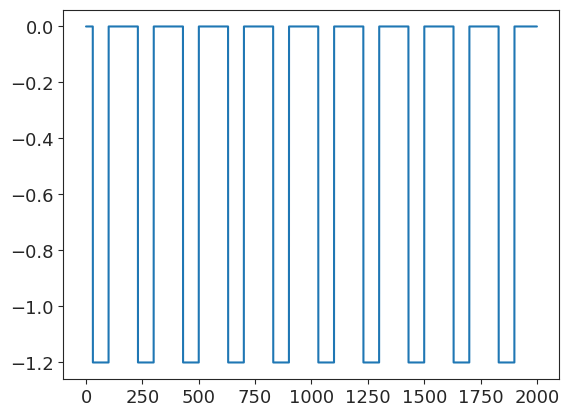

In [ ]:
# Input current protocol function by Mels
# t = duration; dt = time step;
# p = period duration; a = current amplitude
def I_input(t, dt, p, a):
  #p = period
  i = 0
  I = np.ones(len(t))*0
  c = -0.05
  cnt = 0
  while i<len(t):
    I[i+int(30/dt):i+int(100/dt)] = a
    i+=int(p/dt)
    c-=0.05
    cnt += 1
  return I
T= duration_of_sim(0, 2000, dt=0.01)
I = I_input(T, 0.01, 200, -1.2)
plt.plot(T, I)

# Input current tested

In [ ]:
T= duration_of_sim(0, 1000, dt=0.005)
dt = 0.005
I_TCinput0 = I_input(T, 0.005, 200, -0.6)
I_TCinput1 = I_input(T, 0.005, 200, -0.8)
I_TCinput2 = I_input(T, 0.005, 200, -0.9)



allvariables_TC_test0=generateburstsTC(I_TCinput0,T,C_m, dt=0.005, regime_name="test gH",k=0)
allvariables_TC_test3=generateburstsTC(I_TCinput1,T,C_m, dt=0.005, regime_name="test gH",k=0)
allvariables_TC_test7=generateburstsTC(I_TCinput2,T,C_m, dt=0.005, regime_name="test gH",k=0)

0.01
0
0.01
0
0.01
0


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

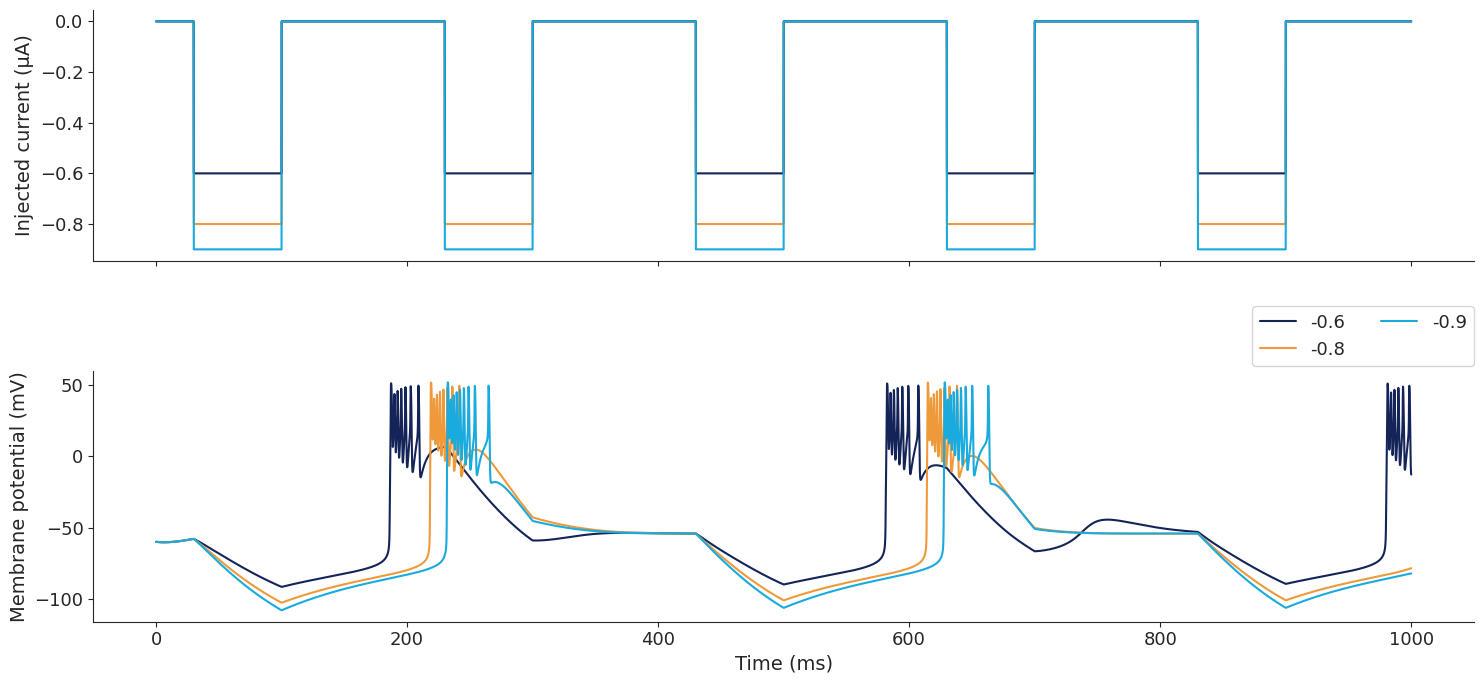

In [ ]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(15,7), tight_layout=True) #7,5 is better for shorter plots


V_TC0= allvariables_TC_test0['Membrane potential (mV)']
I0=allvariables_TC_test0['Injected current (μA)']

V_TC1= allvariables_TC_test3['Membrane potential (mV)']
I1=allvariables_TC_test3['Injected current (μA)']

V_TC2= allvariables_TC_test7['Membrane potential (mV)']
I2=allvariables_TC_test7['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I1, color= '#EE9A3A')
plt.plot(T,I0, color='#142459')
plt.plot(T,I2, color= '#19AADE')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('Injected current (μA)')

plt.subplot(2,1,2)
plt.plot(T,V_TC0, label='-0.6', color='#142459')
plt.plot(T,V_TC1,label='-0.8', color='#EE9A3A')
plt.plot(T,V_TC2,label='-0.9', color='#19AADE')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')


# Functions for next subfigure

In [ ]:
def generateburstsTC(I,T,C_m,dt,regime_name,k):


        allvariables_TC={}

        g_Na_TC, g_K_TC, g_T_TC, g_L_TC, g_H, g_KL_TC, I_bg, V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC =init_isolatedTC(T, regime_name, k)

        print(g_L_TC)
        print(g_H)
        I=I

        for i in range(len(T)-1):

            I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

            I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

            I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

            I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

            I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

            I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m


            V_TC[i+1]=(I[i]/C_m-I_K_TC[i]-I_L_TC[i]-I_T_TC[i]-I_Na_TC[i]-I_H_TC[i]-I_KL_TC[i])*dt+V_TC[i]



            n_TC[i+1]=-(n_TC[i]-gate.n_inf(V_TC[i]))*dt/gate.tau_n(V_TC[i]) +n_TC[i]

            m_TC[i+1]=-(m_TC[i]-gate.m_inf(V_TC[i]))*dt/gate.tau_m(V_TC[i]) +m_TC[i]

            h_TC[i+1]=-(h_TC[i]-gate.h_inf(V_TC[i]))*dt/gate.tau_h(V_TC[i]) +h_TC[i]

            m_Ca_TC[i+1]= gate.m_Ca_TC_inf(V_TC[i+1])

            h_Ca_TC[i+1]=-(h_Ca_TC[i]-gate.h_Ca_TC_inf(V_TC[i]))*dt/gate.tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

            S_H_TC[i+1]= -(S_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_S(V_TC[i]) + S_H_TC[i]

            F_H_TC[i+1]= 0#-(F_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_F(V_TC[i]) + F_H_TC[i]

        allvariables_TC = {'Injected current (μA)': I, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC,'I_h (nA)':I_H_TC, 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 'Membrane potential (mV)':V_TC}

        return allvariables_TC

In [ ]:
def init_isolatedTC(T, regime_name, k):
    '''input arguments: T: duration of simulation'''

    g_Na_TC=0 #90
    g_K_TC=0  #10
    #g_T_TC=2
    # DEPENDS???


    if regime_name=="regime 1":
        ## how to add two choices here?? (think)
        g_L_TC=0.01
        g_KL_TC= 0
        g_H=0.015 #0.015
        I_bg=0

    elif regime_name=="spontaneous":
        g_L_TC=0.01
        g_KL_TC= 0.0172
        g_H=0.015
        I_bg=0


    elif regime_name=="test leaky":
        g_L_TC_list= list([0.01, 0.03, 0.05, 0.07, 0.09, 0.1])
        # g_L_TC_list=list([0.3, 0.4, 0.5])
        # g_L_TC_list=list([0.03, 0.06, 0.09]) # used this for comparing gLmax effect on burst latency
        g_KL_TC= 0
        g_H=0.015
        I_bg= 0
        g_L_TC= g_L_TC_list[k]
    elif regime_name=="test gH":
        g_H_list = list([0, 0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5])
        g_L_TC=0.01
        g_KL_TC= 0
        I_bg=0
        g_H = g_H_list[k]
    elif regime_name == "test gT":
        g_T_list = list([0, 0.5, 1, 2])
        g_L_TC=0.01
        g_KL_TC= 0
        I_bg=0
        g_H = 0
        g_T_TC = g_T_list[k]



    Ca_conc=np.zeros(len(T))
#    Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.
    Ca_conc[0]=0.00 #mM of calcium   ---> CHECK THIS INITIAL CONC.


    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #(changed from -70 mV)
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100

    # membrane potential at each time point
    V_TC=np.zeros(len(T))
    V_TC[0]=-60 #change between 0 to -60 or -65 to Vleak value i.e, -70

    #current contributed by ion channels in each time point
    I_K_TC=np.zeros(len(T)) # Potassium
    I_Na_TC=np.zeros(len(T)) # Sodium
    I_L_TC=np.zeros(len(T)) # k Leaky channels
    I_KL_TC= np.zeros(len(T)) # k Leaky channels
    I_H_TC=np.zeros(len(T))
    I_T_TC=np.zeros(len(T))


    # open probabilities of each channel gates at each time point
    n_TC=np.zeros(len(T))
    m_TC=np.zeros(len(T))
    h_TC=np.zeros(len(T))
    S_H_TC=np.zeros(len(T))
    F_H_TC=np.zeros(len(T))

     #initial rate values for K and Na rate equations
    n_TC[0]=gate.alpha_n_TRN(V_TC[0])/(gate.alpha_n_TRN(V_TC[0])+gate.beta_n_TRN(V_TC[0]))
    m_TC[0]=gate.alpha_m_TRN(V_TC[0])/(gate.alpha_m_TRN(V_TC[0])+gate.beta_m_TRN(V_TC[0]))
    h_TC[0]=gate.alpha_h_TRN(V_TC[0])/(gate.alpha_h_TRN(V_TC[0])+gate.beta_h_TRN(V_TC[0]))
    alpha_S_TC_0= gate.H_TC_inf(V_TC[0])/gate.tau_H_S(V_TC[0])
    beta_S_TC_0= (1-gate.H_TC_inf(V_TC[0]))/gate.tau_H_S(V_TC[0])
    S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= gate.H_TC_inf(V_TC[0])/gate.tau_H_F(V_TC[0])
    beta_F_TC_0= (1-gate.H_TC_inf(V_TC[0]))/gate.tau_H_F(V_TC[0])
    F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)


    #initial rate values for
    m_Ca_TC=np.zeros(len(T))
    h_Ca_TC=np.zeros(len(T))

    m_Ca_TC[0]=gate.m_Ca_TC_inf(0)
    h_Ca_TC[0]=gate.h_Ca_TC_inf(0)

    return g_Na_TC, g_K_TC, g_T_TC, g_L_TC, g_H, g_KL_TC, I_bg, V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC

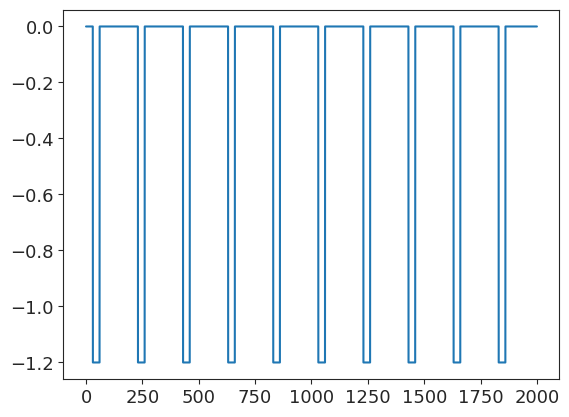

In [ ]:
def I_input(t, dt, p, a):
  #p = period
  i = 0
  I = np.ones(len(t))*0
  c = -0.05
  cnt = 0
  while i<len(t):
    I[i+int(30/dt):i+int(60/dt)] = a
    i+=int(p/dt)
    c-=0.05
    cnt += 1
  return I
T= duration_of_sim(0, 2000, dt=0.01)
I = I_input(T, 0.01, 200, -1.2)
plt.plot(T, I)

# gT tested

In [ ]:
T= duration_of_sim(0, 1000, dt=0.005)
dt = 0.005
I_TCinput0 = I_input(T, 0.005, 300, -1.5)
I_TCinput1 = I_input(T, 0.005, 200, -0.8)
I_TCinput2 = I_input(T, 0.005, 200, -0.9)
I_TCinput0= 0*np.ones(len(T))
I_TCinput0[int(30/dt):int(60/dt)]= -1.5


allvariables_TC_test0=generateburstsTC(I_TCinput0,T,C_m, dt=0.005, regime_name = "test gT", k=0) #gT=0

allvariables_TC_test3=generateburstsTC(I_TCinput0,T,C_m, dt=0.005, regime_name = "test gT",k=2) #gT=1
allvariables_TC_test7=generateburstsTC(I_TCinput0,T,C_m, dt=0.005, regime_name = "test gT",k=3) #gT=2

0.01
0
0.01
0
0.01
0


(0.0, 400.0)

<Figure size 640x480 with 0 Axes>

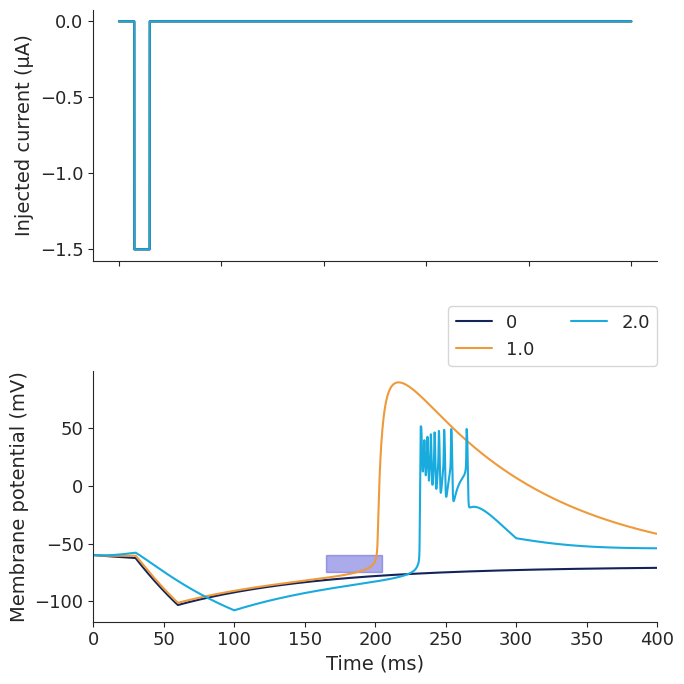

In [ ]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(7,7), tight_layout=True) #7,5 is better for shorter plots


V_TC0= allvariables_TC_test0['Membrane potential (mV)']
I0=allvariables_TC_test0['Injected current (μA)']

V_TC1= allvariables_TC_test3['Membrane potential (mV)']
I1=allvariables_TC_test3['Injected current (μA)']

V_TC3= allvariables_TC_test7['Membrane potential (mV)']
I2=allvariables_TC_test7['Injected current (μA)']

# V_TC3= allvariables_TC_test3['Membrane potential (mV)']
# I3=allvariables_TC_test3['Injected current (μA)']

# # V_TC4= allvariables_TC_test4['Membrane potential (mV)']
# # I4=allvariables_TC_test4['Injected current (μA)']

# V_TC5= allvariables_TC_test5['Membrane potential (mV)']
# I5=allvariables_TC_test5['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I1, color= '#EE9A3A')
plt.plot(T,I0, color='#142459')
plt.plot(T,I2, color= '#19AADE')
# plt.title('gLmax value affects the frequency of bursts in TRN')
# # plt.box(on=None) : removes the entire box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('Injected current (μA)')
# plt.xlim(90, 250)
plt.subplot(2,1,2)
plt.plot(T,V_TC0, label='0', color='#142459')
plt.plot(T,V_TC1,label='1.0', color='#EE9A3A')
plt.plot(T,V_TC2,label='2.0', color='#19AADE')

#Add the T-current activation window
import matplotlib.patches as mpatches
rect = mpatches.Rectangle((165, -75), 40, 15, alpha=0.5,color="#5856D6" )

# Add the patch to the plot
# plt.add_patch(rect)
plt.gca().add_patch(rect)
# plt.plot(T,V_TC3,label='0.07', color='#8B1A1A')
# # plt.plot(T,V_TC4,label='0.09',color='#8B4500')
# plt.plot(T,V_TC5,label='0.1', color='black')
# plt.title('gLmax value affects the frequency of bursts in TRN')
# label ='RMP= -50 mV, V_init=-50'
# plt.xlim(90, 250)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.xlim(0, 400)
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('2. zoom effects of gLmax on the frequency of bursts in TC with current trigger.pdf')

# T current activation window

-64


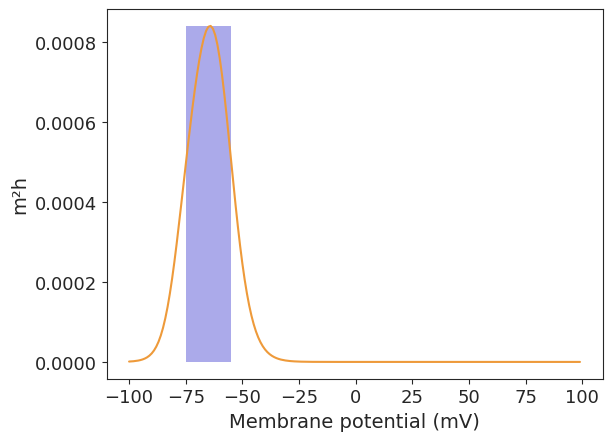

In [ ]:
V = np.arange(-100, 100, 1)
m_Ca_TC_inf = np.zeros(len(V))
h_Ca_TC_inf = np.zeros(len(V))
m2_h = np.zeros(len(V))
for i in range(len(V)):
  m_Ca_TC_inf[i] = gate.m_Ca_TC_inf(V[i])
  h_Ca_TC_inf[i] = gate.h_Ca_TC_inf(V[i])
  m2_h[i] = m_Ca_TC_inf[i]**2 * h_Ca_TC_inf[i]
#plt.plot(V, m_Ca_TC_inf)
#plt.plot(V, h_Ca_TC_inf)
plt.plot(V, m2_h, color = '#EE9A3A')
import matplotlib.patches as mpatches
rect=mpatches.Rectangle((0,15),14,7,
                        fill = False,
                        color = '#EE9A3A',
                        linewidth = 2)
left, bottom, width, height = (-75, 0, 20, np.max(m2_h))
rect=mpatches.Rectangle((left,bottom),width,height,
                        #fill=False,
                        alpha = 0.5,
                        color="#5856D6",
                       linewidth=0)
                       #facecolor="red")
plt.gca().add_patch(rect)
plt.ylabel('m²h')
plt.xlabel('Membrane potential (mV)')
print(V[np.argmax(m2_h)])